### Import the necessary libraries

In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from keras.layers import BatchNormalization
from tensorflow.keras.metrics import BinaryAccuracy

### Load the dataset

In [33]:
dataset,dataset_info = tfds.load("malaria",with_info=True)

In [34]:
print(type (dataset))

<class 'dict'>


In [35]:
# one image
for i in dataset['train'].take(1):
  print(i)

{'image': <tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}


In [36]:
len(dataset["train"])

27558

### Split the datset to train, validation and test dataset

In [37]:
train_dataset = tfds.load("malaria", split="train[:80%]",shuffle_files=True)
val_dataset = tfds.load("malaria", split="train[81%:91%]",shuffle_files=True)
test_dataset = tfds.load("malaria", split="train[90%:]",shuffle_files=True)

In [38]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [39]:
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

22046
2756
2756


### Data Visualization

In [40]:
def get_label(label):
  if label == 0:
    return "Infected"
  else:
    return "Uninfected"

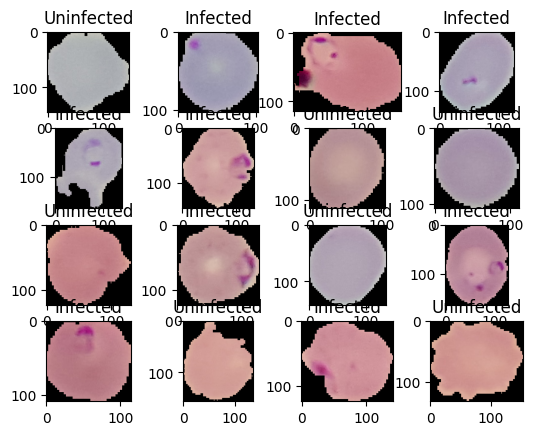

In [41]:
for i, sample in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i + 1)

  plt.imshow(sample['image'])
  plt.title(get_label(sample['label'].numpy()))

### Data Processing
Resizing - Rescaling multiplies the height and width of the image by a scaling factor
<br>Rescaling - to change the values of numeric columns in the dataset to use a common scale. Values are shifted and rescaled so their range can vary between 0 and 1. <br>
1. Normalization : Minimum and maximum value of features are used for scaling <br>
2. Standardization: Mean and standard deviation is used for scaling.

In [42]:
im_size = 224
batch_size = 32

In [43]:
def resize_rescale(input):
    image = input['image']
    label = input['label']
    resized_image = tf.image.resize(image, (im_size, im_size)) / 255.0, input['label']
    return resized_image

In [44]:
train_dataset = train_dataset.map(resize_rescale).shuffle(buffer_size = 8,reshuffle_each_iteration =True).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.map(resize_rescale).shuffle(buffer_size = 8,reshuffle_each_iteration =True).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(resize_rescale).shuffle(buffer_size = 8,reshuffle_each_iteration =True).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [45]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

### Build the model

In [48]:
model = tf.keras.Sequential([InputLayer(input_shape = (im_size, im_size,3)),
                             Conv2D(filters = 6, kernel_size = 3, strides =1, padding='valid',activation = 'relu'),
                             BatchNormalization(),
                             MaxPool2D (pool_size = 2, strides = 2),

                             Conv2D(filters = 16, kernel_size = 3, strides =1,padding='valid', activation = 'relu'),
                             BatchNormalization(),
                             MaxPool2D (pool_size = 2, strides = 2),
                             Flatten(),
                             Dense(100,activation = 'relu'),
                             BatchNormalization(),
                             Dense(10,activation = 'relu'),
                             BatchNormalization(),
                             Dense(1,activation = 'sigmoid'),
                              ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [49]:
model.compile(
    optimizer = Adam(learning_rate = 0.01),
    loss = BinaryCrossentropy(),
    metrics = BinaryAccuracy(),
)

In [50]:
history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs =15,
    verbose = 1
)

Epoch 1/15
689/689 [==============================] - 867s 1s/step - loss: 0.4437 - binary_accuracy: 0.7899 - val_loss: 1.0608 - val_binary_accuracy: 0.7228
Epoch 2/15
689/689 [==============================] - 854s 1s/step - loss: 0.2254 - binary_accuracy: 0.9217 - val_loss: 0.2505 - val_binary_accuracy: 0.9144
Epoch 3/15
689/689 [==============================] - 851s 1s/step - loss: 0.2936 - binary_accuracy: 0.8816 - val_loss: 0.4773 - val_binary_accuracy: 0.6782
Epoch 4/15
689/689 [==============================] - 829s 1s/step - loss: 0.2050 - binary_accuracy: 0.9283 - val_loss: 0.2336 - val_binary_accuracy: 0.9191
Epoch 5/15
689/689 [==============================] - 828s 1s/step - loss: 0.1886 - binary_accuracy: 0.9340 - val_loss: 0.3773 - val_binary_accuracy: 0.8338
Epoch 6/15
689/689 [==============================] - 833s 1s/step - loss: 0.1815 - binary_accuracy: 0.9370 - val_loss: 0.2366 - val_binary_accuracy: 0.9263
Epoch 7/15
689/689 [==============================] - 859s

### Evaluate the model using test dataset

In [51]:
model.evaluate(test_dataset)

87/87 [==============================] - 34s 385ms/step - loss: 0.6298 - binary_accuracy: 0.7261


[0.6297808289527893, 0.7260522246360779]

In [52]:
def parasite_or_not(x):
  if ( x<0.5):
    return str('P')
  else:
    return str('U')

In [56]:
print(parasite_or_not(model.predict(test_dataset.take(1))[0][0]))

1/1 [==============================] - 1s 632ms/step
U


1/1 [==============================] - 0s 327ms/step


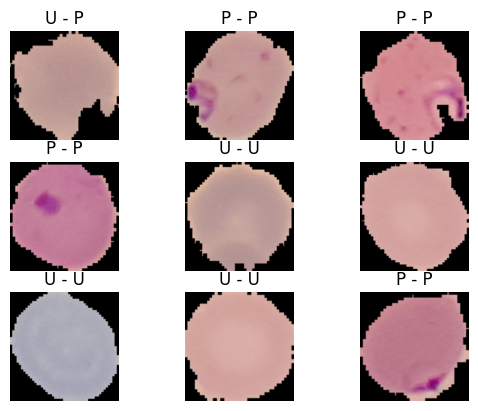

In [62]:
for image,label in test_dataset.take(1):
  for i in range (9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[i])
    plt.title(parasite_or_not(label.numpy()[i])+" - "+ parasite_or_not(model.predict(image)[i][0]))
    plt.axis('off')

### Load and Save the model in Google drive

In [70]:
#Save the model
model.save("LenetSavedModel")

In [71]:
lenet_loaded_model = tf.keras.models.load_model("LenetSavedModel")
lenet_loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

1/1 [==============================] - 0s 326ms/step


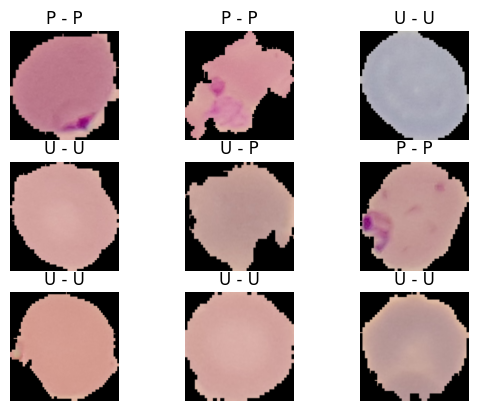

In [72]:
for image,label in test_dataset.take(1):
  for i in range (9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[i])
    plt.title(parasite_or_not(label.numpy()[i])+" - "+ parasite_or_not(lenet_loaded_model.predict(image)[i][0]))
    plt.axis('off')

In [74]:
lenet_loaded_model.evaluate(test_dataset)

87/87 [==============================] - 34s 386ms/step - loss: 0.6298 - binary_accuracy: 0.7261


[0.629780650138855, 0.7260522246360779]

### Load the model in Hd5 format

In [75]:
model.save("LenetSavedModel.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
lenet_loaded_model = tf.keras.models.load_model("LenetSavedModel.hdf5")
lenet_loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

### Save only the weights given the model

In [78]:
model.save_weights("weights/lenet_weights")